In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
%tensorflow_version 2.x

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 數據集內容

This is a(an) Bag


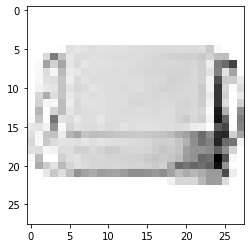

In [10]:
n = 5678

print('This is a(an)',class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys')

This is a Sneaker


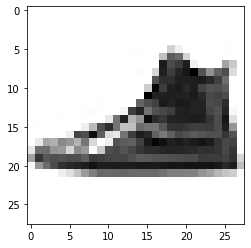

In [11]:
from random import randint

n = randint(1, x_train.shape[0])
print('This is a', class_names[y_train[n]])
plt.imshow(x_train[n], cmap = 'Greys')

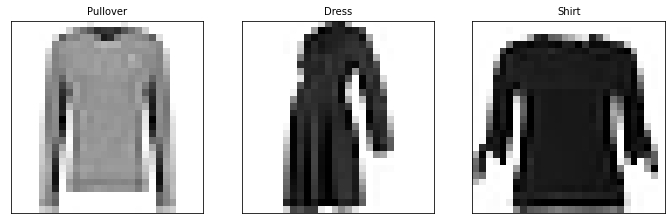

In [13]:
pick = np.random.choice(60000, 5, replace=False)
plt.figure(figsize=(20,10))

for i in range(3):
    n = pick[i]
    ax = plt.subplot(151+i)  #1 row & 5 col & current position is 1
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')

In [14]:
import pandas as pd
dict = {"class_index": list(set(y_train)), "class_name": class_names}
df = pd.DataFrame(dict)
df

,class_index,class_name
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
y_train.shape

(60000,)

# 資料處理

In [0]:
x_train = x_train.reshape(len(x_train), 784)
x_test = x_test.reshape(len(x_test),784)
x_train = x_train/255
x_test = x_test/255

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 打造神經網路

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 組裝神經網路

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy']) 

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


# 訓練

In [26]:
model.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0707 - accuracy: 0.4775
Epoch 2/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0437 - accuracy: 0.7107
Epoch 3/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0354 - accuracy: 0.7742
Epoch 4/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0313 - accuracy: 0.7976
Epoch 5/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0289 - accuracy: 0.8095
Epoch 6/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0274 - accuracy: 0.8190
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0263 - accuracy: 0.8255
Epoch 8/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0254 - accuracy: 0.8302
Epoch 9/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0247 - accuracy: 0.8333
Epoch 10/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0242 - accuracy: 0.8375

# 訓練成果

In [0]:
result = model.predict_classes(x_test)

The predicition from the neural network is Ankle boot


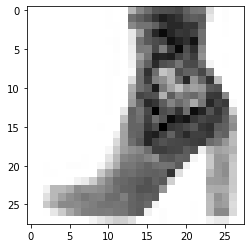

In [30]:
n = 2525

print('The predicition from the neural network is', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')